# Student Name :Sanket Kale
# Student ID  : R00195793

# Data preprocessing , System implementation 

In [28]:
import pandas as pd
import re
import nltk
import csv
from camel_tools.tokenizers.word import simple_word_tokenize
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score



class Arebic_dialect():    
    def __init__(self):
        self.train_data= pd.read_csv('MADAR-Corpus-26-train.tsv', sep='\t',names = ["data","label"],header=None)
        self.test_data= pd.read_csv('MADAR-Corpus-26-dev.tsv', sep='\t',names = ["data","label"],header=None)
        
        ## data Preprocessing
        self.x_train_data = self.DataPreProcessing(self.train_data['data']).values
        self.x_test_data = self.DataPreProcessing(self.test_data['data']).values 
        self.y_train_data = self.train_data['label']
        self.y_test_data  = self.test_data['label']
       
    
    ## Removing punctuations   
    def Punctuations_remove(self,text):
        punctuations_list = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
        translator = str.maketrans('', '', punctuations_list)
        return text.translate(translator)
    
    ## removing duplicate words
    def Duplicate_words(self,text):
        return re.sub(r'(.)\1+', r'\1', text)
    
        
   
    ## data preprocessing method
    def DataPreProcessing(self,data): 
       
        #Stop word
        stopwords_list = stopwords.words('arabic')
        data = data.apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_list))
        
        #removing punctuations 
        data = data.apply(lambda x: self.Punctuations_remove(x))
        #data = data.str.replace(punctuations_list,' ')
        
        # removing duplicateworkds 
        data = data.apply(lambda x: " ".join(self.Duplicate_words(x) for x in x.split()))
              
        # stemming data  
        st = ISRIStemmer()
        data = data.apply(lambda x: " ".join(st.stem(x) for x in x.split()))
        data.head()        
    
        return data
    
    ## vectorization of word
    def TFIDF_Word_Vector(self,train,test):                  
        v = TfidfVectorizer(tokenizer=simple_word_tokenize,analyzer='word',ngram_range=(1, 3),lowercase=False)
        x_train_tfidf = v.fit_transform(self.train_data['data'])
        x_test_tfidf = v.transform(self.test_data['data'])         
        return x_train_tfidf,x_test_tfidf
    
    ## charcterization of words
    def TFIDF_Char_Vector(self,train,test):
        v = TfidfVectorizer(lowercase=False,ngram_range=(2,5),max_features = 10000,analyzer='char',tokenizer=lambda x: x.split(' '))
        #v = TfidfVectorizer(analyzer="char",ngram_range=(1, 1),lowercase=False)
        x_train_tfidf = v.fit_transform(self.train_data['data'])
        x_test_tfidf = v.transform(self.test_data['data']) 
        #x_test_tfidf = v.fit_transform(test_df['desc'])
        return x_train_tfidf,x_test_tfidf
      
    ## labelEncoder
    def Lable_Encoder(self,train,test):
        #Encoding output labels
        lbl_enc = preprocessing.LabelEncoder()
        y_train_tfidf = lbl_enc.fit_transform(train)
        y_test_tfidf = lbl_enc.fit_transform(test)
        return y_train_tfidf,y_test_tfidf
    
    ## Model 1: Multinomial Naive Bayes Classifier
    def MultinomialNB_model(self,x_train,y_train,x_test,y_testdata):
        nb = MultinomialNB()
        nb.fit(x_train, y_train)
        y_pred = nb.predict(x_test)
        
        accuracy = accuracy_score(y_pred, y_testdata) * 100
        f1 = f1_score(y_pred, y_testdata, average = "macro") * 100
        recall = recall_score(y_pred, y_testdata, average = "macro") * 100
        precision = precision_score(y_pred, y_testdata, average = "macro") * 100
             
        print("Multinomial Naive Bayes Classifier")
        print ("\nOVERALL SCORES:")
        ## prints overall scores (accuracy, f1, recall, precision)
        print ("MACRO AVERAGE PRECISION SCORE: %.2f" %precision, "%")
        print ("MACRO AVERAGE RECALL SCORE: %.2f" %recall, "%")
        print ("MACRO AVERAGE F1 SCORE: %.2f" %f1, "%")
        print ("OVERALL ACCURACY: %.2f" %accuracy, "%\n")
        
        
    ## Model 2: Linear SVM
    def SVM(self,x_train,y_train,x_test,y_test):
        lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
        lsvm.fit(x_train, y_train)
        y_pred = lsvm.predict(x_test)
        
        accuracy = accuracy_score(y_pred, y_test) * 100
        f1 = f1_score(y_pred, y_test, average = "macro") * 100
        recall = recall_score(y_pred, y_test, average = "macro") * 100
        precision = precision_score(y_pred, y_test, average = "macro") * 100
        
      
        print("Linear SVM")
        print ("\nOVERALL SCORES:")
        ## prints overall scores (accuracy, f1, recall, precision)
        print ("MACRO AVERAGE PRECISION SCORE: %.2f" %precision, "%")
        print ("MACRO AVERAGE RECALL SCORE: %.2f" %recall, "%")
        print ("MACRO AVERAGE F1 SCORE: %.2f" %f1, "%")
        print ("OVERALL ACCURACY: %.2f" %accuracy, "%\n")
    
    
    def main(self):

        ## label encoder
        y_train_data,y_test_data =self.Lable_Encoder(self.y_train_data,self.y_test_data)
        
        ## Word Gram
        print("word-gram")
        ## Word-gram features with uni-gram, bi-gram and tri-gram;        
        x_train_tfidf,x_test_tfidf =self.TFIDF_Word_Vector(self.x_train_data,self.x_test_data)     
        
       
        ## Model 1: Multinomial Naive Bayes Classifier
        self.MultinomialNB_model(x_train_tfidf, self.y_train_data,x_test_tfidf,self.y_test_data)        
        
        
        ## Model 2: Linear SVM
        self.SVM(x_train_tfidf, self.y_train_data,x_test_tfidf,self.y_test_data)
        
        print("Character-gram")
        ## Character-gram features with/without word boundary consideration, from bi-gram and up to 5-gram.
        x_train_tfidf,x_test_tfidf =self.TFIDF_Char_Vector(self.x_train_data,self.x_test_data)
        

        ## Model 1: Multinomial Naive Bayes Classifier
        self.MultinomialNB_model(x_train_tfidf, self.y_train_data,x_test_tfidf,self.y_test_data)        
        
       
        self.SVM(x_train_tfidf, self.y_train_data,x_test_tfidf,self.y_test_data)
        

data_p = Arebic_dialect()
data_p.main()
           

word-gram
Multinomial Naive Bayes Classifier

OVERALL SCORES:
MACRO AVERAGE PRECISION SCORE: 62.12 %
MACRO AVERAGE RECALL SCORE: 63.43 %
MACRO AVERAGE F1 SCORE: 62.09 %
OVERALL ACCURACY: 62.12 %

Linear SVM

OVERALL SCORES:
MACRO AVERAGE PRECISION SCORE: 58.31 %
MACRO AVERAGE RECALL SCORE: 58.90 %
MACRO AVERAGE F1 SCORE: 57.68 %
OVERALL ACCURACY: 58.31 %

Character-gram
Multinomial Naive Bayes Classifier

OVERALL SCORES:
MACRO AVERAGE PRECISION SCORE: 54.48 %
MACRO AVERAGE RECALL SCORE: 54.54 %
MACRO AVERAGE F1 SCORE: 53.88 %
OVERALL ACCURACY: 54.48 %

Linear SVM

OVERALL SCORES:
MACRO AVERAGE PRECISION SCORE: 52.50 %
MACRO AVERAGE RECALL SCORE: 52.22 %
MACRO AVERAGE F1 SCORE: 51.28 %
OVERALL ACCURACY: 52.50 %



# LSTM Deep Network

In [20]:


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
import gensim
import re
import numpy as np
from nltk import ngrams
import spacy


#calling class Arebic_dialect to get preprocessed data
ad =Arebic_dialect()


#load the gensim data
model = gensim.models.Word2Vec.load('full_grams_cbow_100_twitter.mdl')
print("We've",len(model.wv.index2word),"vocabularies")

#Word to vector
w2v_weights = model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
MAX_SEQUENCE_LENGTH = 200

print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))


# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


#tokenization
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(ad.x_train_data)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


#text to sequence
X = tokenizer.texts_to_sequences(ad.x_train_data)
X_test_data = tokenizer.texts_to_sequences(ad.x_test_data)

#Padding 
X_test= pad_sequences(X_test_data, maxlen=MAX_SEQUENCE_LENGTH)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

#get dummies for target data
Y = pd.get_dummies(ad.y_train_data)
Y_test= pd.get_dummies(ad.y_test_data)
print('Shape of label tensor:', Y.shape)

#split the data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42,shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


#LSTM Implementation with weights
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    weights=[w2v_weights], input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(26, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


epochs = 5
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs,shuffle=True, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


We've 1476715 vocabularies
Vocabulary Size: 1476715 - Embedding Dim: 100
Found 9404 unique tokens.
Shape of data tensor: (41600, 250)
Shape of label tensor: (41600, 26)
(37440, 250) (37440, 26)
(4160, 250) (4160, 26)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          147671500 
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 26)                2626      
Total params: 147,754,526
Trainable params: 147,754,526
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
527/527 

In [22]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

130/130 [==============================] - 6s 49ms/step - loss: 2.2362 - accuracy: 0.3022
Test set
  Loss: 2.236
  Accuracy: 0.302


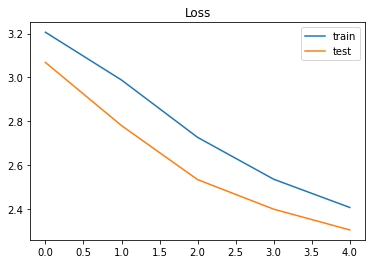

In [23]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

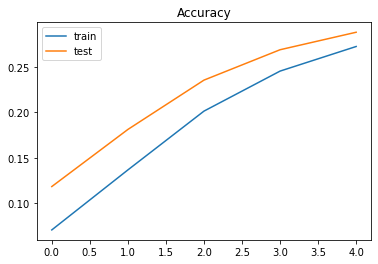

In [27]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();